<a href="https://colab.research.google.com/github/aimlgoat/Unsupervised-Learning/blob/main/CreditCardCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context


 Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries and data

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
from scipy import stats

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering

### Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations


*   Dataset has 660 rows and 7
 columns
*   


- Sanity checks

In [ ]:
filepath='/content/drive/MyDrive/aiml/Credit+Card+Customer+Data.xlsx'

In [ ]:
data=pd.read_excel(filepath)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.000,330.500,190.670,1.000,165.750,330.500,495.250,660.000
Customer Key,660.000,55141.444,25627.772,11265.000,33825.250,53874.500,77202.500,99843.000
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.shape

(660, 7)

In [ ]:
df=data.copy()

In [ ]:
df.drop(columns=['Sl_No'],inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Customer Key'],inplace=True)


In [ ]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Questions

1. How is the distrubution of average credit limit of customer? **Distribution is skewed to the right which implies the median credit limit is low**
2. What percenatage of the customers have never made a service-related call to the bank? **About 14% **
3. What percentage of customers have never logged in to the online portal? **About 38%**
4. How many customers have never visited bank? **About 15%**
3. How are the different variables correlated with each other?

<Axes: xlabel='Avg_Credit_Limit', ylabel='Count'>

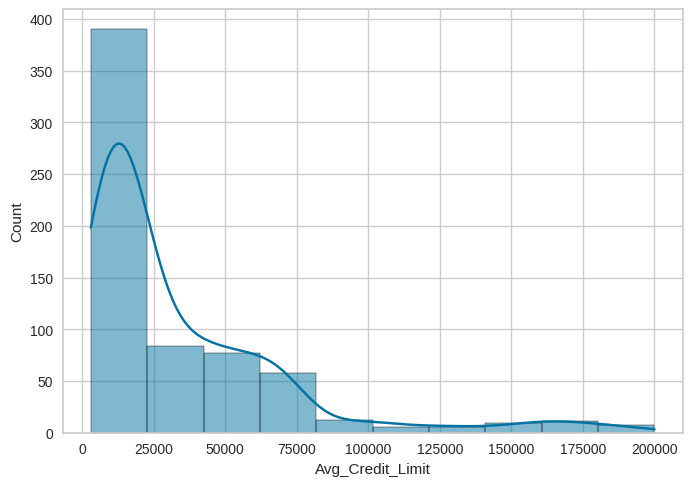

In [ ]:
sns.histplot(data=df,x='Avg_Credit_Limit',bins=10,kde=True)

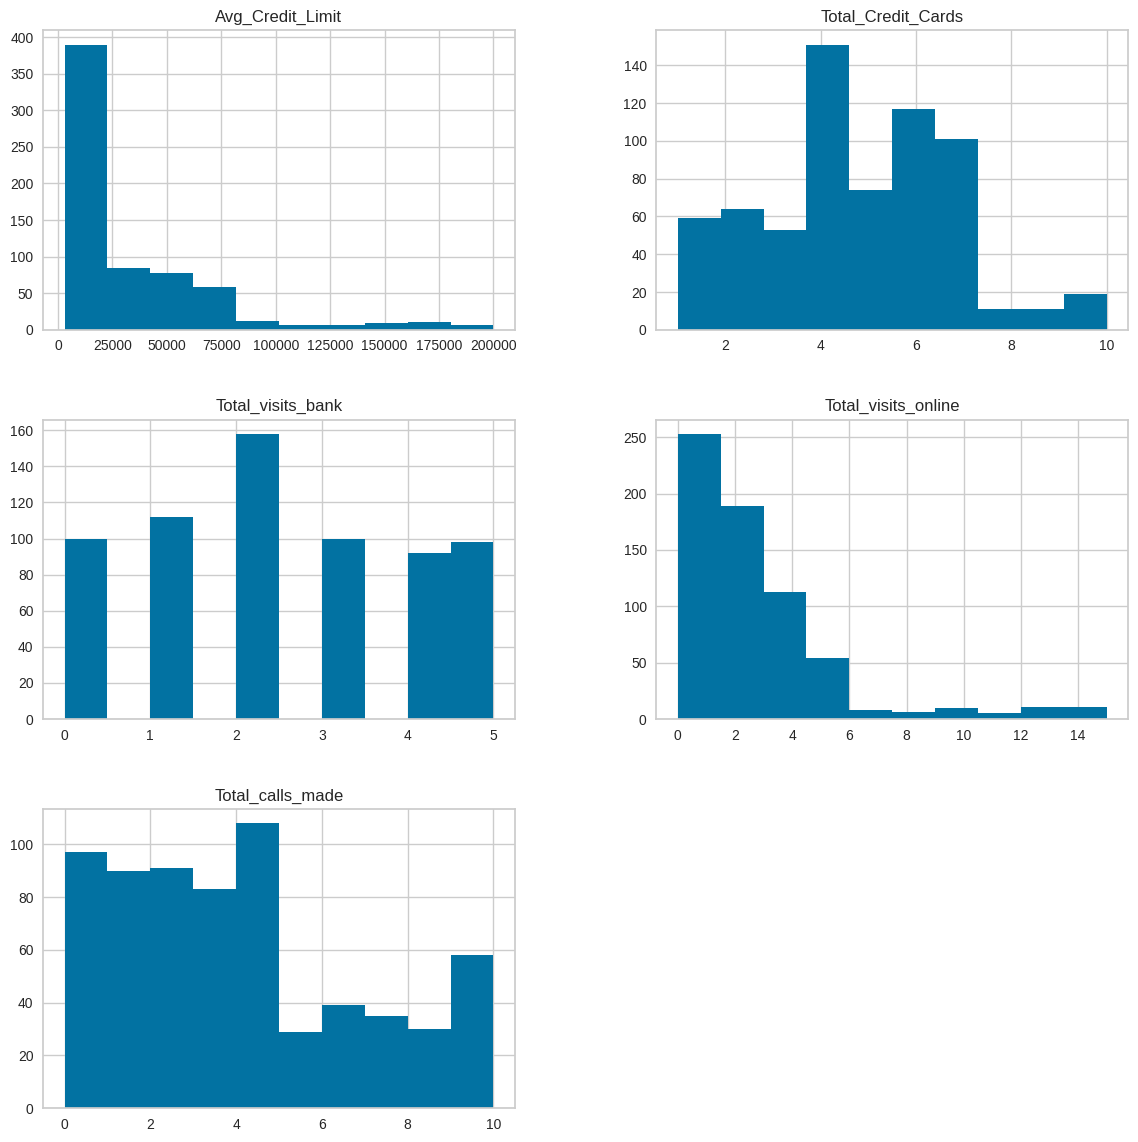

In [ ]:
df.hist(figsize=(14,14));

<Axes: >

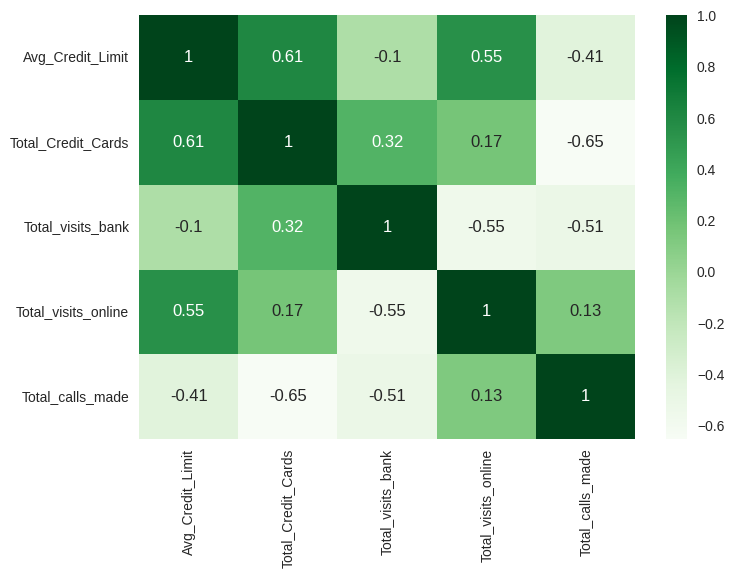

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

*   Average credit limit and total visits online/total credit cards are directly correlated, slightly low or no impact to total visits to the bank
*   Total credit cards and total calls made have high negative correlation and have a low positive correlation with total visits online and a medium correlation with total visits bank
*   Total visits bank and total calls made/total visits online are negatively correlated, positively correlated with total credit cards and low or no impact to the avg credit limit
*   Total visits online and total calls made are slightly positive correlated,negatively correlated with total visits to the bank, low positive correlated with total credit cards and highly correlated with avg credit limit









## Data Preprocessing



- Duplicate value check **No duplicates have been found**
- Missing value treatment NO missing values found
- Outlier check None required
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

# Outlier check

In [ ]:
def createBoxPlots(d):
  plt.figure(figsize=(24,6))
  for c in d.columns:
    plt.subplot(1,len(d.columns),d.columns.get_loc(c)+1)
    plt.boxplot(d[c],vert=True)
    plt.title(c)

  plt.tight_layout()
  plt.show()

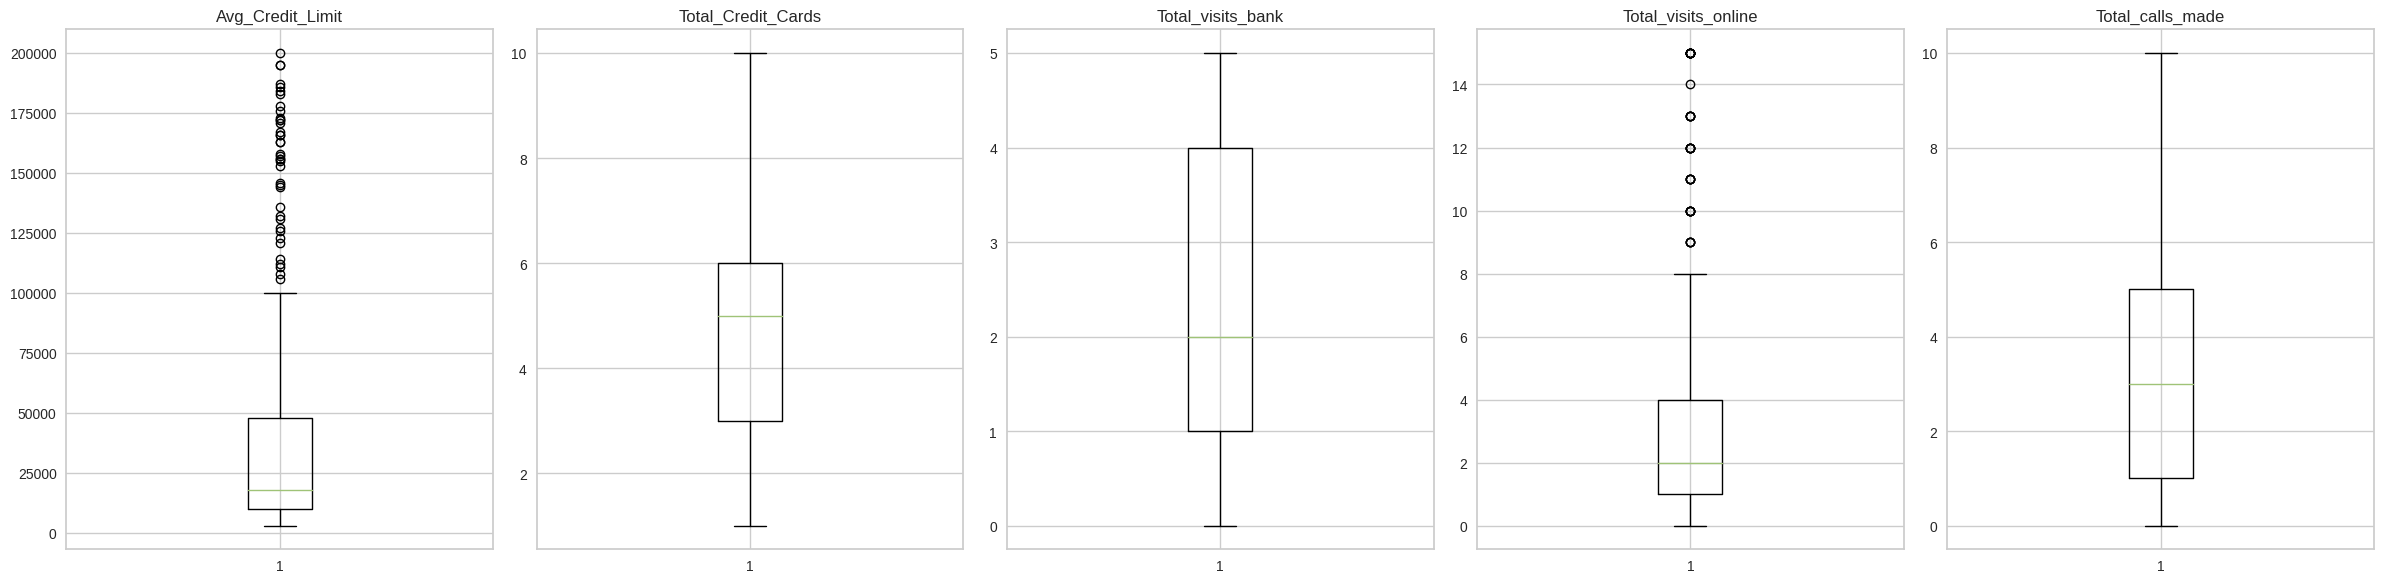

In [ ]:
createBoxPlots(df)

Avg credit limit and total visits online have some outliers, how ever the data looks valid , there could be customers with high credit limit and also customers might visit online upto 15 times. As such no treatment is not necessary


In [ ]:
scaler = StandardScaler()

In [ ]:
subset=df.copy()
subsetarr=scaler.fit_transform(subset)
scaleddf=pd.DataFrame(subsetarr,columns=df.columns)
scaleddf
df.head(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


## EDA

- It is a good idea to explore the data once again after manipulating it.

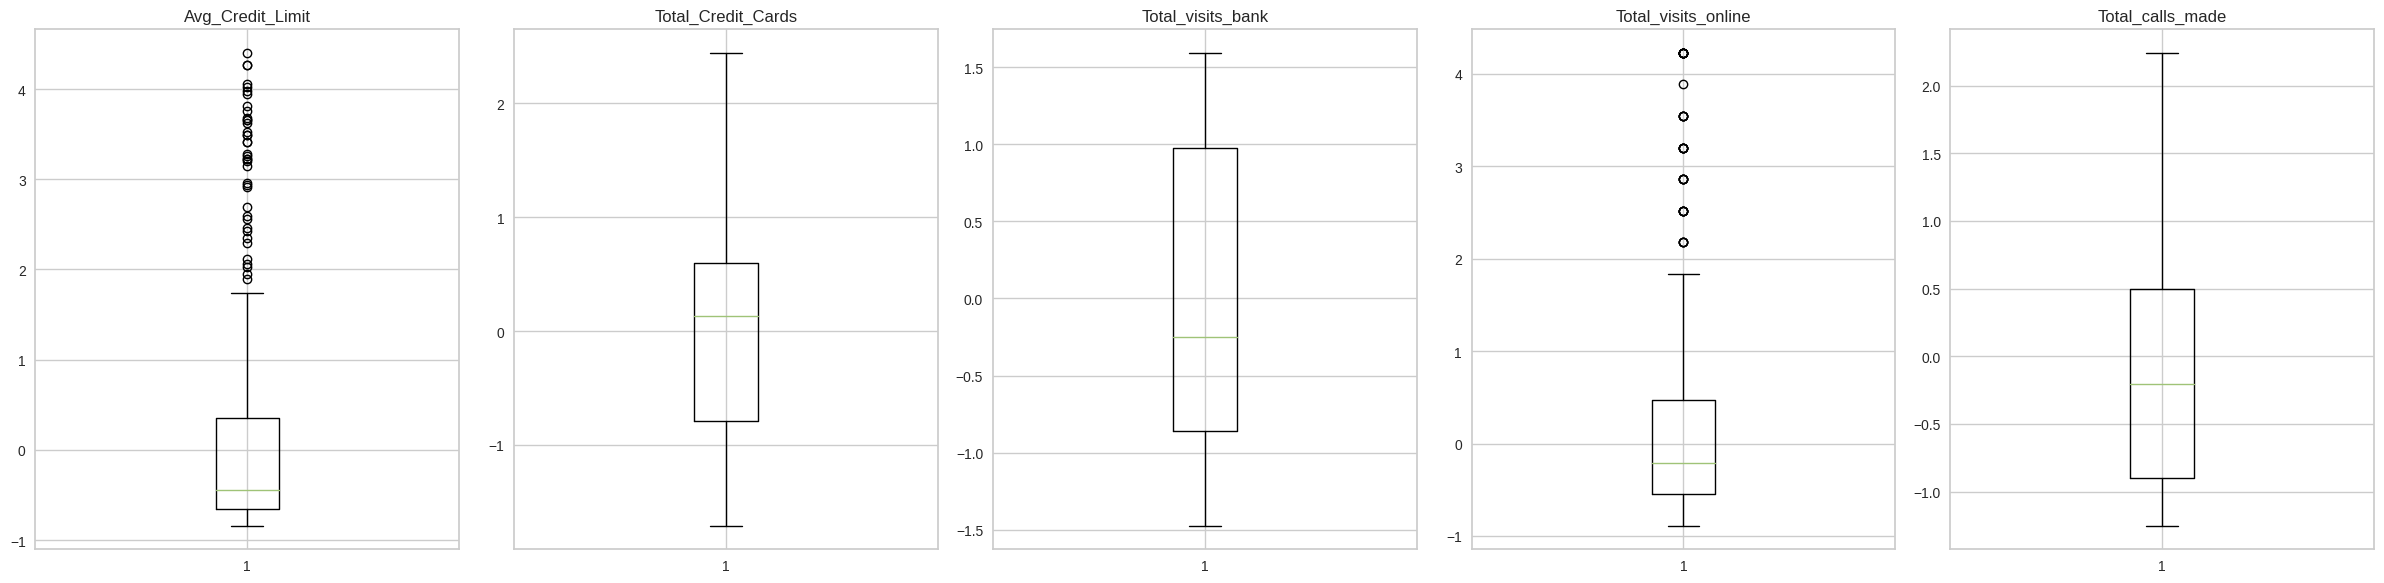

In [ ]:
createBoxPlots(scaleddf)

Boxplots look the same after the data was manipulated

In [ ]:
#import numpy as np

# Create a sample 2D array
arr = np.array([[5, 10, 15],
                [2, 6, 12],
                [8, 3, 9]])

# Find the minimum value along each row (axis=1)
min_values_along_rows = np.min(arr, axis=1)

print("Original array:")
print(arr)

print("\nMinimum values along each row:")
print(sum(min_values_along_rows))


Original array:
[[ 5 10 15]
 [ 2  6 12]
 [ 8  3  9]]

Minimum values along each row:
10


## K-means Clustering

###Elbow method

In [ ]:
meanDistortions=[]
clusters=range(1,10)
for i in clusters:
  model=KMeans(i,random_state=1)
  model.fit(scaleddf)
  prediction=model.predict(scaleddf)
  #print(model.cluster_centers_)
  #print(prediction.size)
  dist=cdist(scaleddf, model.cluster_centers_, "euclidean")
  #print(dist)
  res=sum(np.min(dist,axis=1))
  distortion=res/df.shape[0]
  meanDistortions.append(distortion)
meanDistortions

[2.006922226250361,
 1.4571553548514269,
 1.1466276549150365,
 1.0463825294774465,
 0.9908683849620168,
 0.9426543606899347,
 0.9093991915419353,
 0.8843243844476886,
 0.8650832420580971]

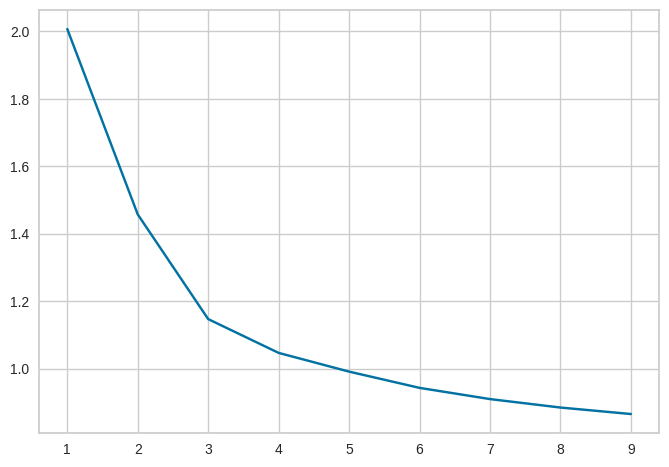

In [ ]:
plt.plot(clusters,meanDistortions)

###Silhouette Scores

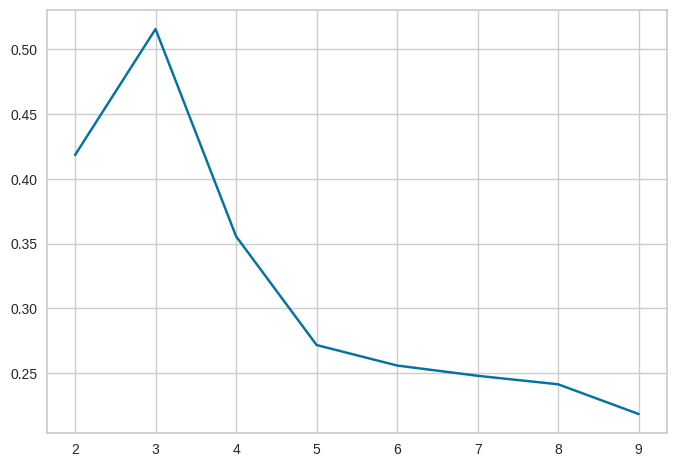

In [ ]:
sil_scr=[]
sil_index=range(2,10)
for i in sil_index:
  sil_m=KMeans(i,random_state=1)
  preds=sil_m.fit_predict(scaleddf)
  scr=silhouette_score(scaleddf,preds)
  sil_scr.append(scr)

sil_scr
plt.plot(sil_index,sil_scr);

###Silhouette Visualizer

Below are the points that every cluster needs to satisfy for selecting the optimal K-value.
  - There should be no negative silhouette coefficent value
  - All the clusters should cross the avg silhouette score
  - All the clusters should have the different variations (width)
  - All the clusters should have different silhouette score
  
**Note**
1. Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
2. Horizontal line refers to the Silhouette score of each cluster.
3. Dotted red line is an Average Silhouette score.

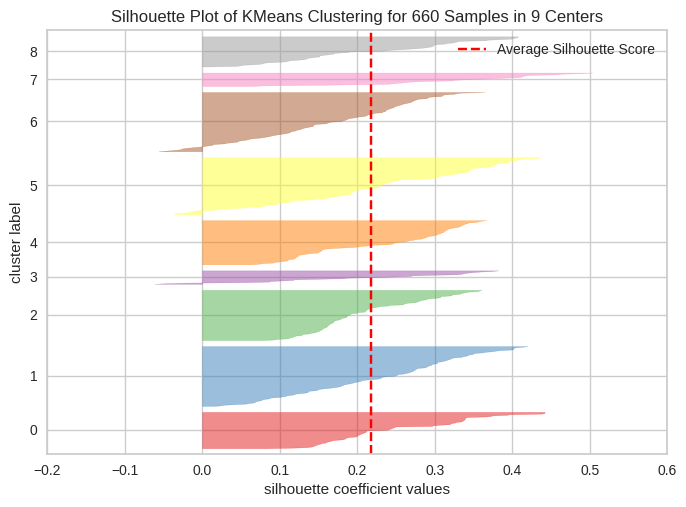

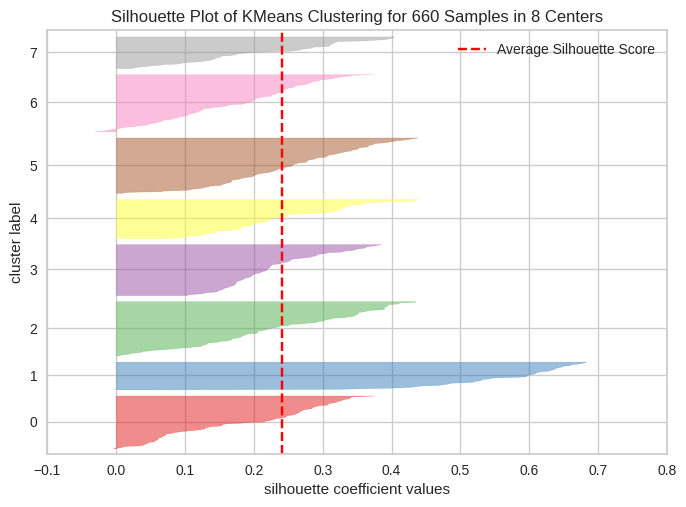

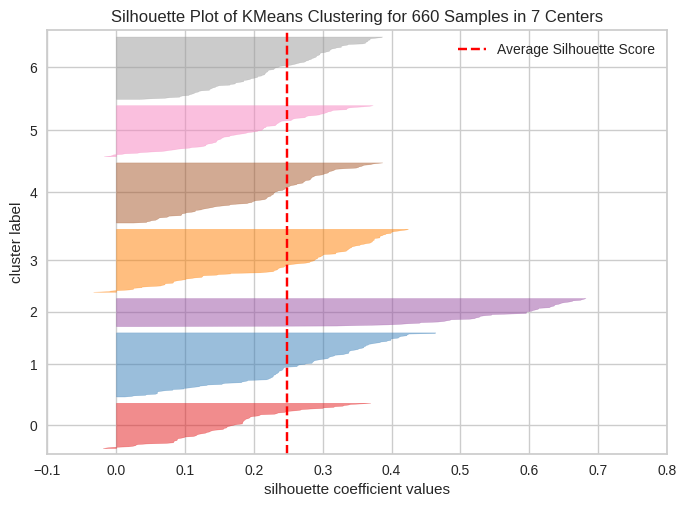

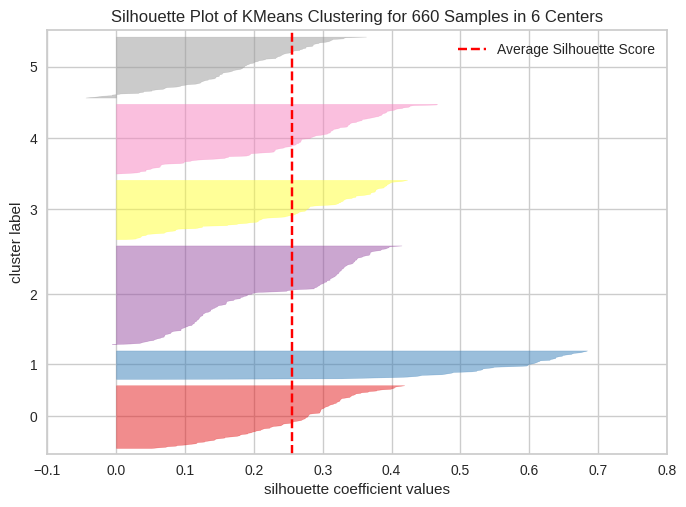

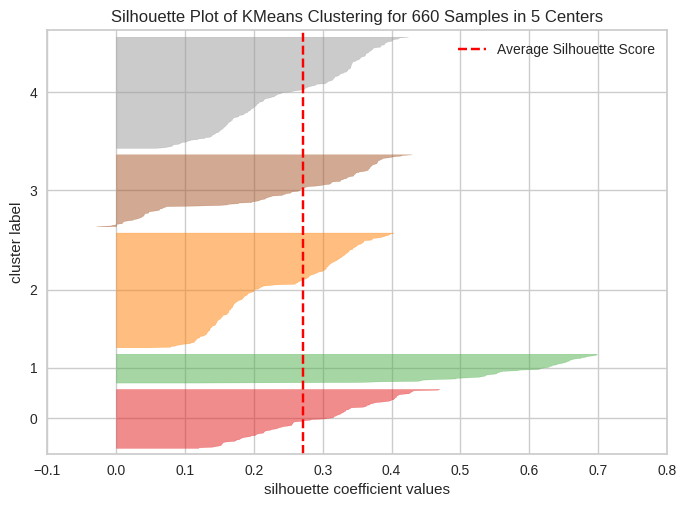

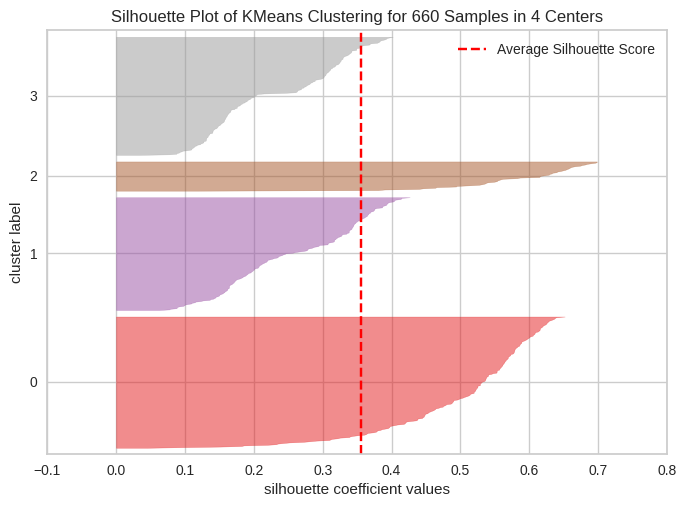

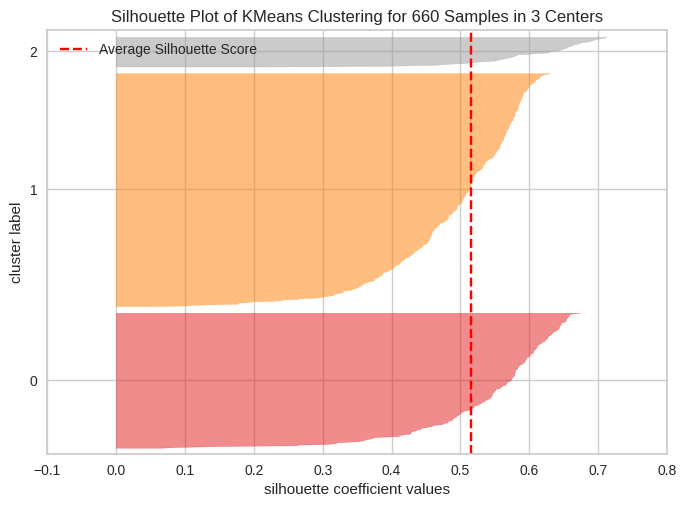

In [ ]:
for j in range(9,2,-1):
  vis=SilhouetteVisualizer(KMeans(j,random_state=1))
  vis.fit(scaleddf)
  vis.show()

##Observations


*   K=3 clusters looks like the ideal choice as the widths are different from each cluster, no negative coefficients and all the three clusters have above average silhouette scores.




In [ ]:
mod=KMeans(n_clusters=3,random_state=1)
ci=mod.fit_predict(scaleddf)
kmsdf=scaleddf.copy()
kmdf=df.copy()

In [ ]:

kmsdf['clusters']=ci
kmdf['clusters']=ci
kclusterdf=kmdf.groupby('clusters').mean()
kclusterdf

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
clusters,,,,,
0,12174.107,2.411,0.933,3.554,6.871
1,33782.383,5.516,3.490,0.982,2.000
2,141040.000,8.740,0.600,10.900,1.080


In [ ]:
kclusterdf['count']=kmdf.groupby('clusters')['Avg_Credit_Limit'].count()
kclusterdf

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count
clusters,,,,,,
0,12174.107,2.411,0.933,3.554,6.871,224
1,33782.383,5.516,3.490,0.982,2.000,386
2,141040.000,8.740,0.600,10.900,1.080,50


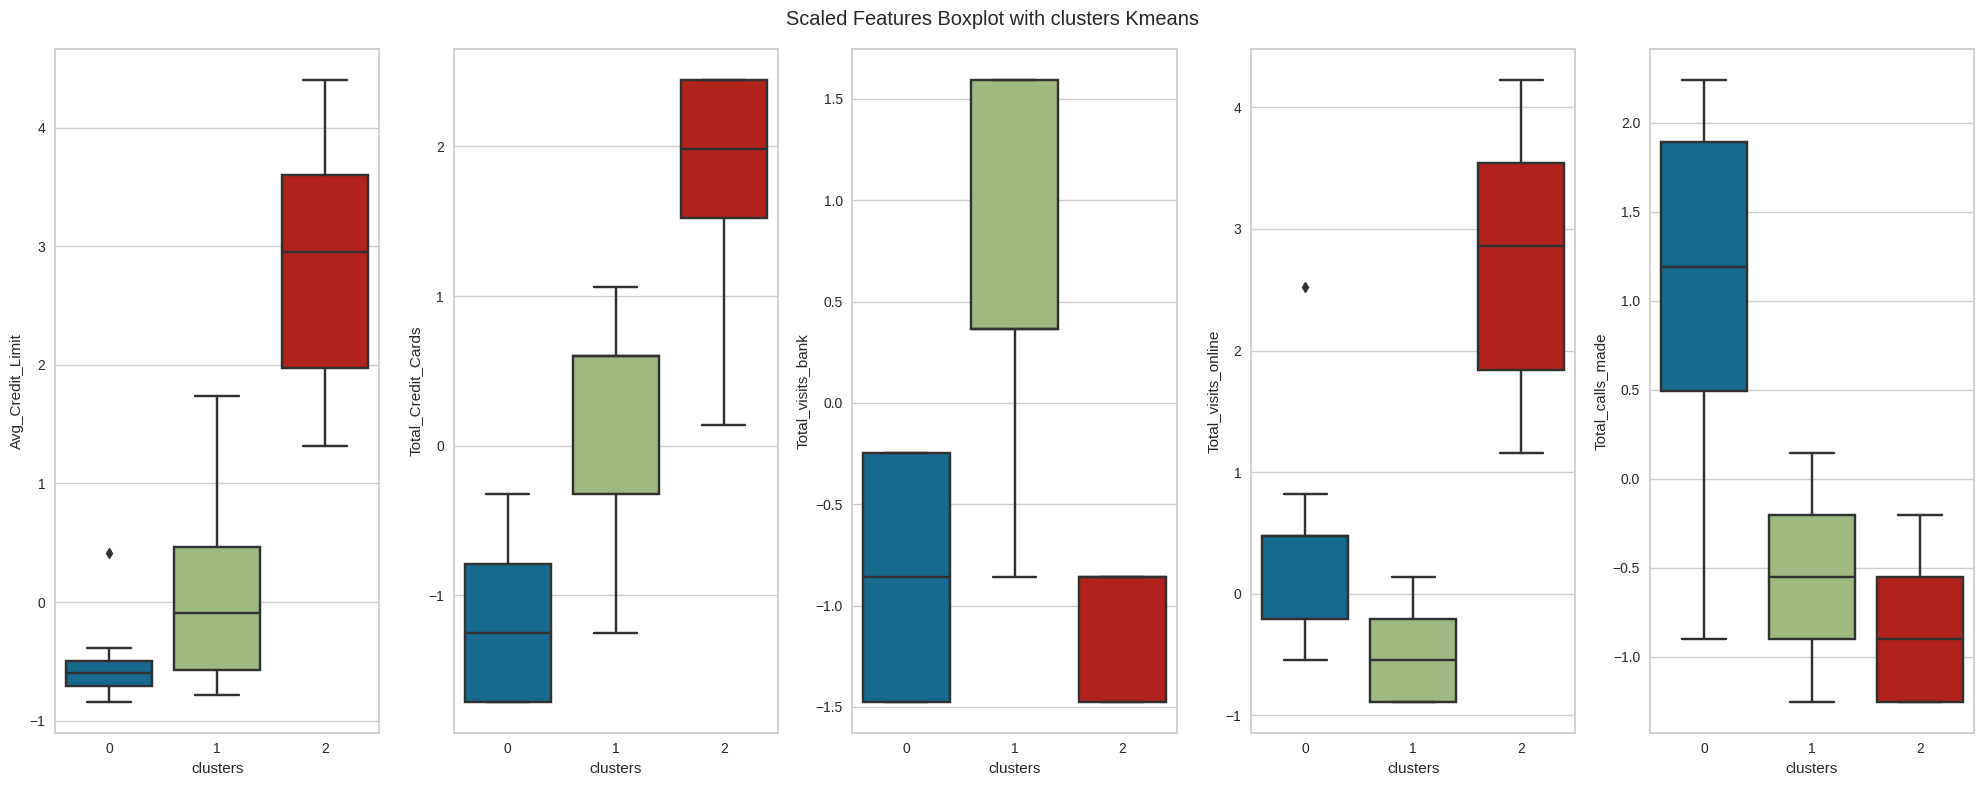

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(20,8))
fig.suptitle('Scaled Features Boxplot with clusters Kmeans')
for ii in range(5):
  sns.boxplot(ax=axes[ii],x=kmsdf['clusters'],y=kmsdf[kmsdf.columns[ii]])
plt.tight_layout()
plt.show()

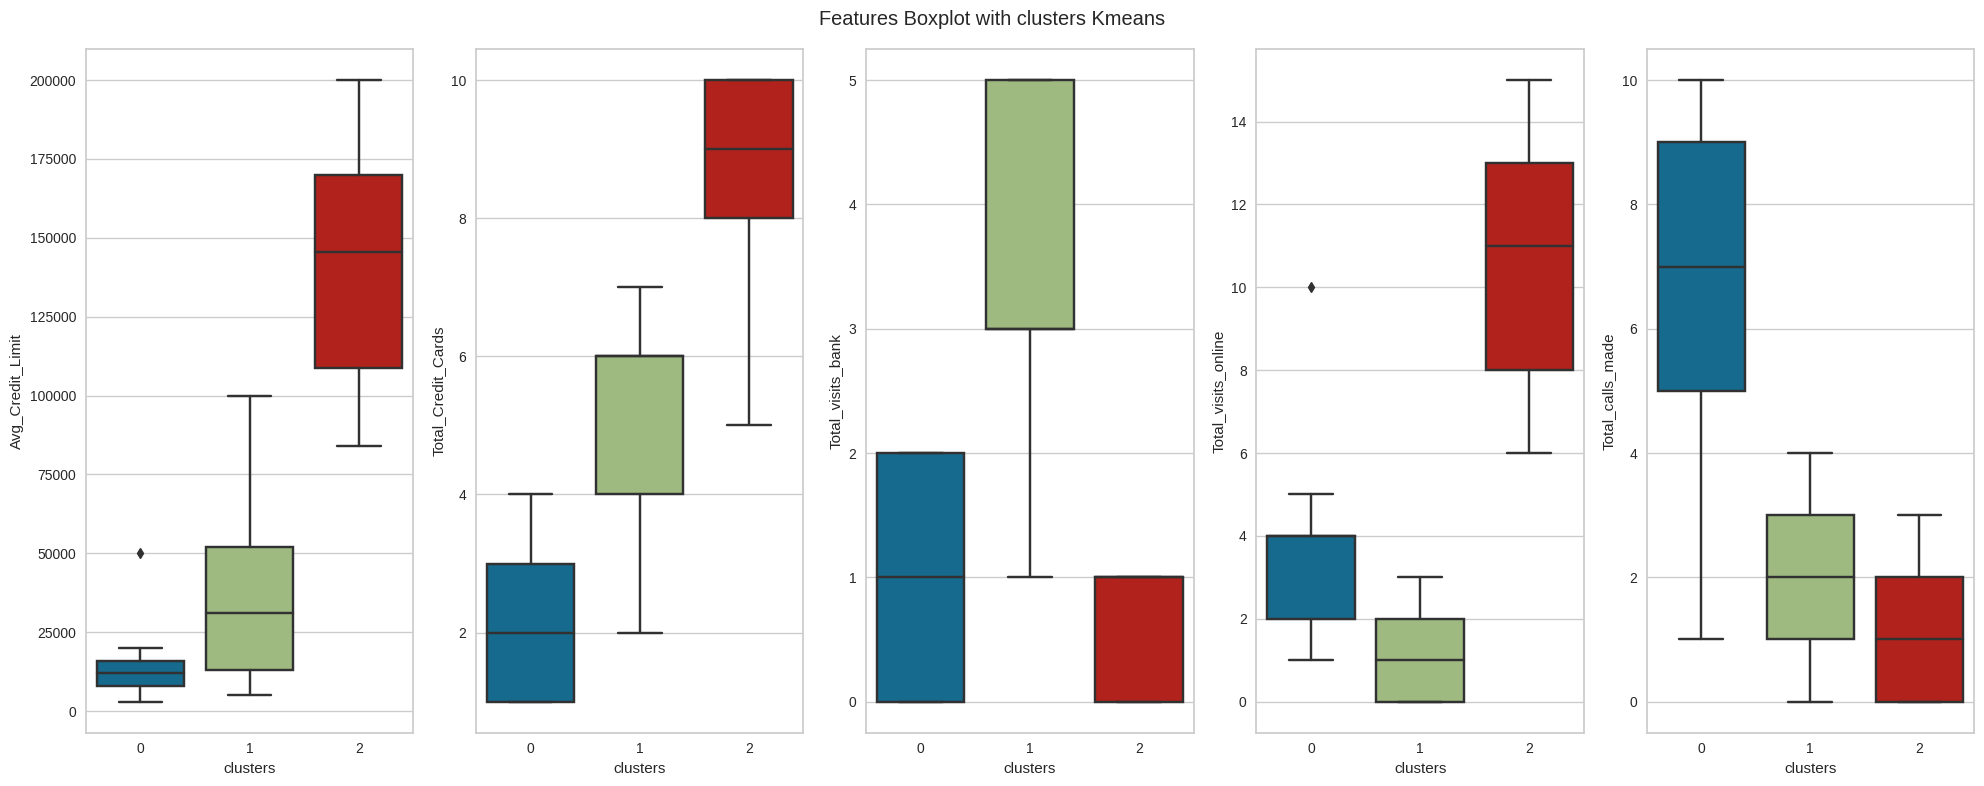

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(20,8))
fig.suptitle('Features Boxplot with clusters Kmeans')
for ii in range(5):
  sns.boxplot(ax=axes[ii],x=kmdf['clusters'],y=kmdf[kmdf.columns[ii]])
plt.tight_layout()
plt.show()

## Hierarchical Clustering

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]]
pd [0.1786471  0.14306129 0.20869372 0.53118409 0.30612356 0.2112843
 0.7891329  0.20562852 0.3842079  0.39536284 0.18963685 0.38229325
 0.70162138 0.2462733  0.60040816 0.38621822 0.31477278 0.66072543
 0.73154383 0.50704448 0.13477076 0.8842009  0.2252094  0.67115269
 0.94052292 0.45541762 0.84531028 0.97470248] size 28
[[ 3.          6.          0.13477076  2.        ]
 [ 0.          2.          0.14306129  2.        ]
 [ 1.          5.          0.18963685  2.        ]
 [ 8.          9.          0.31477278  4.        ]
 [ 4.         10.          0.39536284  3.        ]
 [11.         12.          0.73154383  7.        ]
 [ 7.         13.          0.97470248  8.        ]]


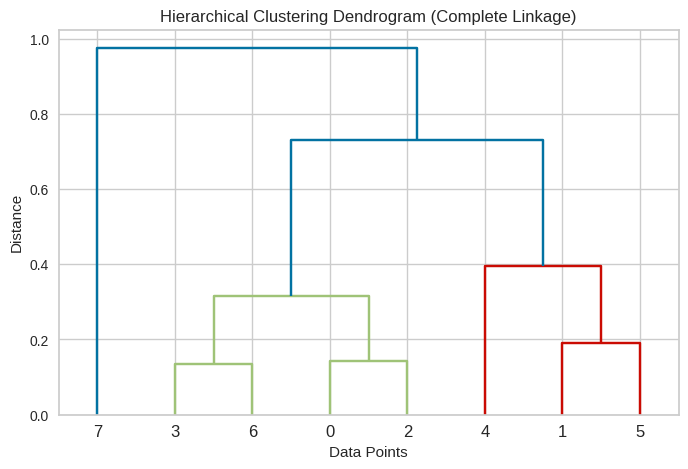

c 0.81742616976237 coph_dists [0.73154383 0.14306129 0.31477278 0.73154383 0.73154383 0.31477278
 0.97470248 0.73154383 0.73154383 0.39536284 0.18963685 0.73154383
 0.97470248 0.31477278 0.73154383 0.73154383 0.31477278 0.97470248
 0.73154383 0.73154383 0.13477076 0.97470248 0.39536284 0.73154383
 0.97470248 0.73154383 0.97470248 0.97470248]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
np.random.seed(0)
data = np.random.rand(8, 2)
print(data)
pd=pdist(data)
print('pd {} size {}'.format(pd,pd.size))
# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(data, method='complete')
print(linkage_matrix)
# Plot the dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
c,coph_dists=cophenet(linkage_matrix,pd)
print('c {} coph_dists {}'.format(c,coph_dists))


In [ ]:
ld=linkage(scaleddf,method="single",metric="cityblock")
print(scaleddf.head())
print(ld)
print(ld[0])
pd=pdist(scaleddf)
print(pd[0])
print(pd)
c,d=cophenet(ld,pd)
print('c {} d {}'.format(c,d))

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             1.740              -1.249             -0.860   
1             0.410              -0.788             -1.474   
2             0.410               1.059             -0.860   
3            -0.122               0.136             -0.860   
4             1.740               0.597             -1.474   

   Total_visits_online  Total_calls_made  
0               -0.547            -1.252  
1                2.521             1.892  
2                0.134             0.146  
3               -0.547             0.146  
4                3.202            -0.204  
[[4.64000000e+02 4.97000000e+02 0.00000000e+00 2.00000000e+00]
 [2.50000000e+02 3.61000000e+02 0.00000000e+00 2.00000000e+00]
 [3.34000000e+02 3.85000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [0.00000000e+00 1.30600000e+03 2.60396853e+00 6.09000000e+02]
 [1.00000000e+00 1.31600000e+03 2.60877718e+00 6.10000000e+02]
 [1.31500000e+03 1.31700000e+03 3.37289873e+00 6.

###Compare models using cophenetic correlation coefficient

In [ ]:
dist_types=["euclidean","chebyshev","cityblock","mahalanobis"]
linkages=["single","complete","average","weighted"]
pd=pdist(scaleddf)
coeffs=[]
ldcols=[]
# fig,pic=plt.subplots(16,1,figsize=(15,40))
piccount=0
for dt in dist_types:
  for k,l in enumerate(linkages):
    lm=linkage(scaleddf,method=l,metric=dt)
    coeff,cophenetic_dist=cophenet(lm,pd)
    print('Cophentic coeff {} for linkage {} and distance {}'.format(coeff,l,dt))
    #if (dt == 'euclidean'):
    #dendrogram(lm,ax=pic[piccount])
    # piccount+=1
    # pic[k].set_title('Dendogram for linkage {} and distance {}'.format(l,dt))
    # pic[k].annotate(f"Cophenetic\nCorrelation\n{coeff:0.2f}",(0.8,0.8),xycoords='axes fraction')
# plt.tight_layout()
# plt.show()
lm=linkage(scaleddf,method="ward",metric="euclidean")
c, cd=cophenet(lm,pd)
print('Cophentic coeff {} for linkage {} and distance {}'.format(c,"ward","euclidean"))


Cophentic coeff 0.7391220243806552 for linkage single and distance euclidean
Cophentic coeff 0.8599730607972423 for linkage complete and distance euclidean
Cophentic coeff 0.8977080867389372 for linkage average and distance euclidean
Cophentic coeff 0.8861746814895477 for linkage weighted and distance euclidean
Cophentic coeff 0.7382354769296767 for linkage single and distance chebyshev
Cophentic coeff 0.8533474836336782 for linkage complete and distance chebyshev
Cophentic coeff 0.8974159511838106 for linkage average and distance chebyshev
Cophentic coeff 0.8913624010768603 for linkage weighted and distance chebyshev
Cophentic coeff 0.7252379350252723 for linkage single and distance cityblock
Cophentic coeff 0.8731477899179829 for linkage complete and distance cityblock
Cophentic coeff 0.896329431104133 for linkage average and distance cityblock
Cophentic coeff 0.8825520731498188 for linkage weighted and distance cityblock
Cophentic coeff 0.7058064784553605 for linkage single and dist

Cophetic coefficients for linkage average and distance euclidean/linkage weighted and distance chebyshev seem to be high,  further dendogram analysis on these linkages should be done to determine the number of clusters. In addition we will also take a look at ward's dendogram analysis.

## Cluster Profiling and Comparison

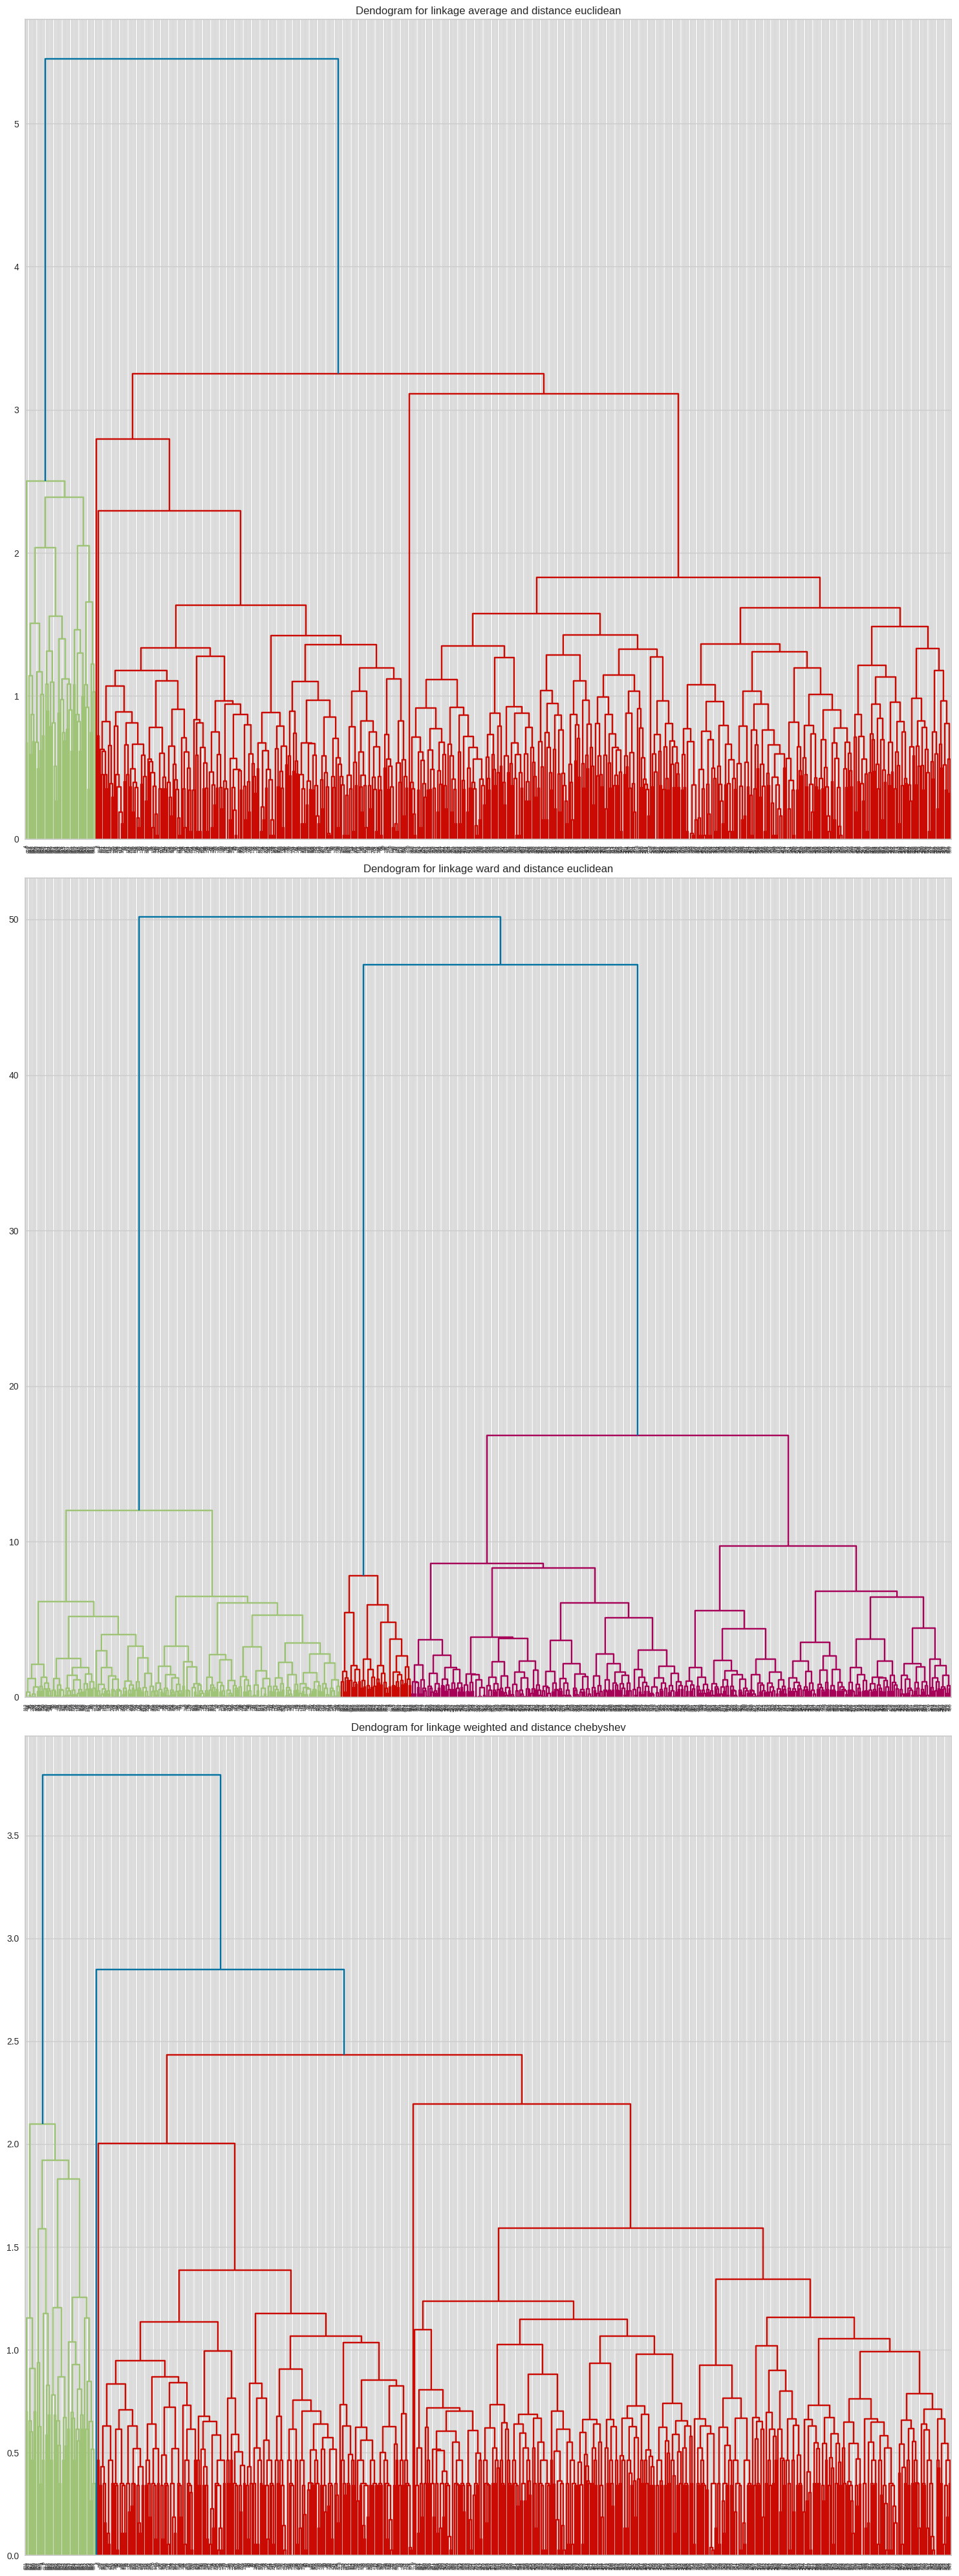

In [ ]:
dist_types=["euclidean","chebyshev"]
linkages=["average","weighted"]
pd=pdist(scaleddf)
lms=[]
ldcols=[]
fig,pic=plt.subplots(3,1,figsize=(15,40))
piccount=0

lm=linkage(scaleddf,method="average",metric="euclidean")
dendrogram(lm,ax=pic[piccount])
pic[piccount].set_title('Dendogram for linkage average and distance euclidean')
piccount+=1

lm=linkage(scaleddf,method="ward",metric="euclidean")
dendrogram(lm,ax=pic[piccount])
pic[piccount].set_title('Dendogram for linkage ward and distance euclidean')
piccount+=1

lm=linkage(scaleddf,method="weighted",metric="chebyshev")
dendrogram(lm,ax=pic[piccount])
pic[piccount].set_title('Dendogram for linkage weighted and distance chebyshev')
piccount+=1

plt.tight_layout()
plt.show()

Based on the dendogram , linkage ward seems to give a cleaner separation of datapoints at the threshold line of 11 which gives a total of 3 clusters

###Let's create 3 clusters

In [ ]:
hierModel=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
hierModel.fit(scaleddf)


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
hcsdf=scaleddf.copy()
hcdf=df.copy()

In [ ]:
hcsdf['clusters']=hierModel.labels_
hcdf['clusters']=hierModel.labels_

In [ ]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


In [ ]:
clusterdf=hcdf.groupby('clusters').mean()

In [ ]:
clusterdf['count_per_cluster']=df.groupby('clusters')['Total_Credit_Cards'].count()

In [ ]:
clusterdf.style.highlight_max(color="lightgreen",axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_per_cluster
clusters,,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805,385
1,12151.111111,2.422222,0.937778,3.546667,6.857778,225
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


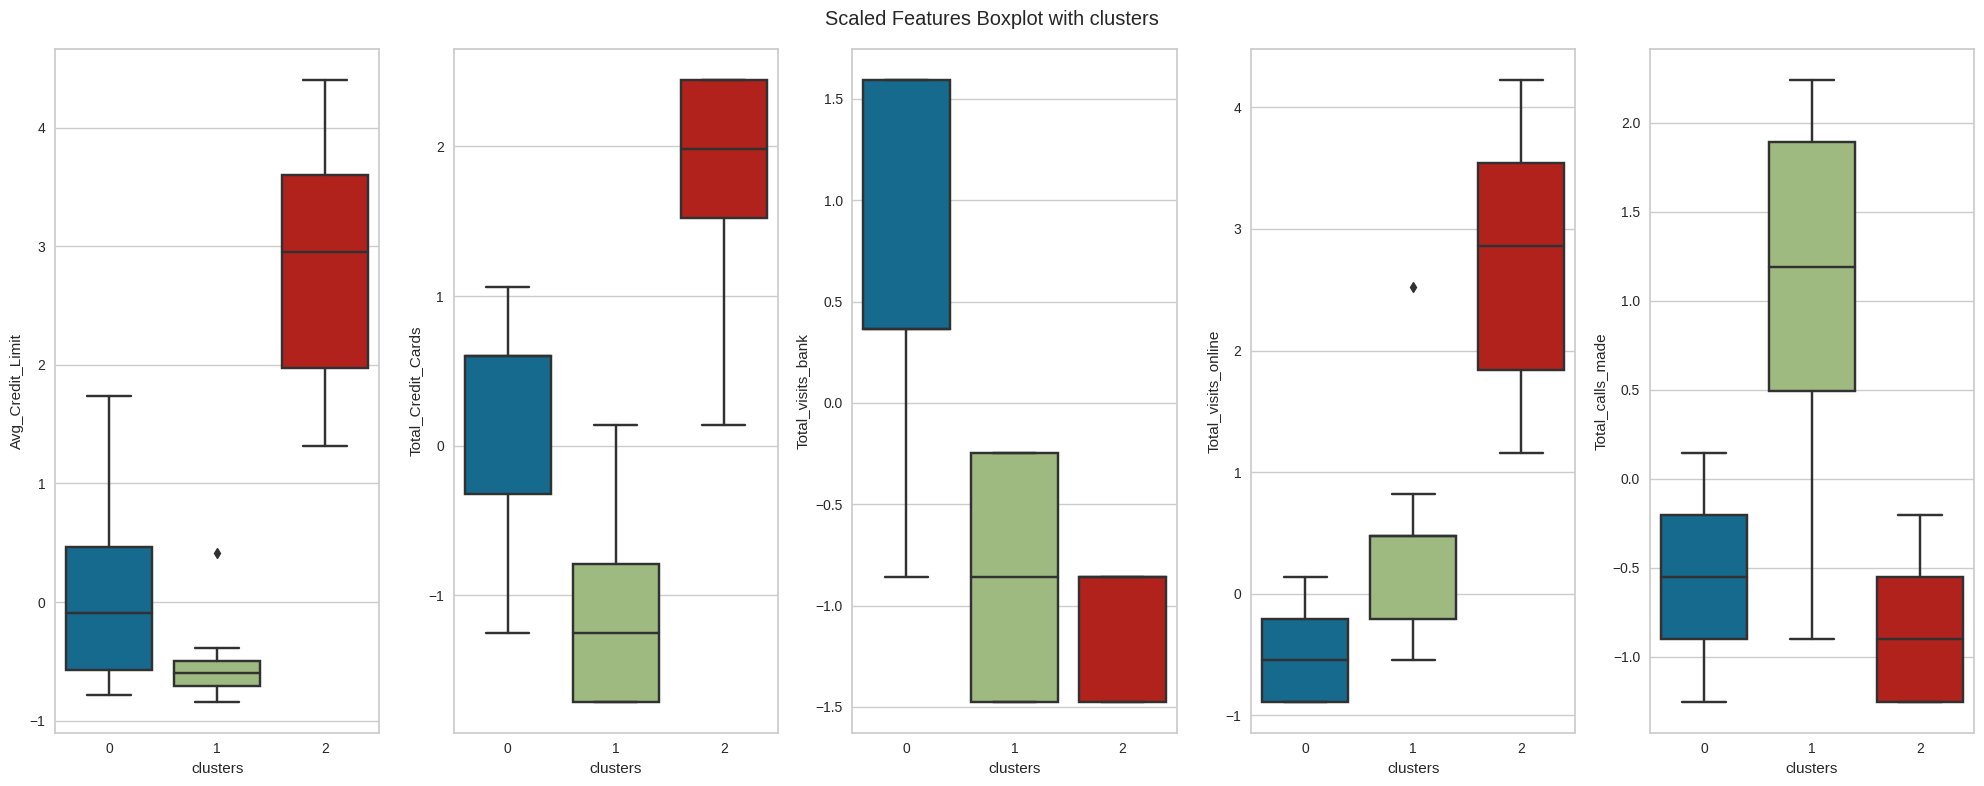

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(20,8))
fig.suptitle('Scaled Features Boxplot with clusters')
for ii in range(5):
  sns.boxplot(ax=axes[ii],x=scaleddf['clusters'],data=scaleddf,y=scaleddf[scaleddf.columns[ii]])
plt.tight_layout()
plt.show()

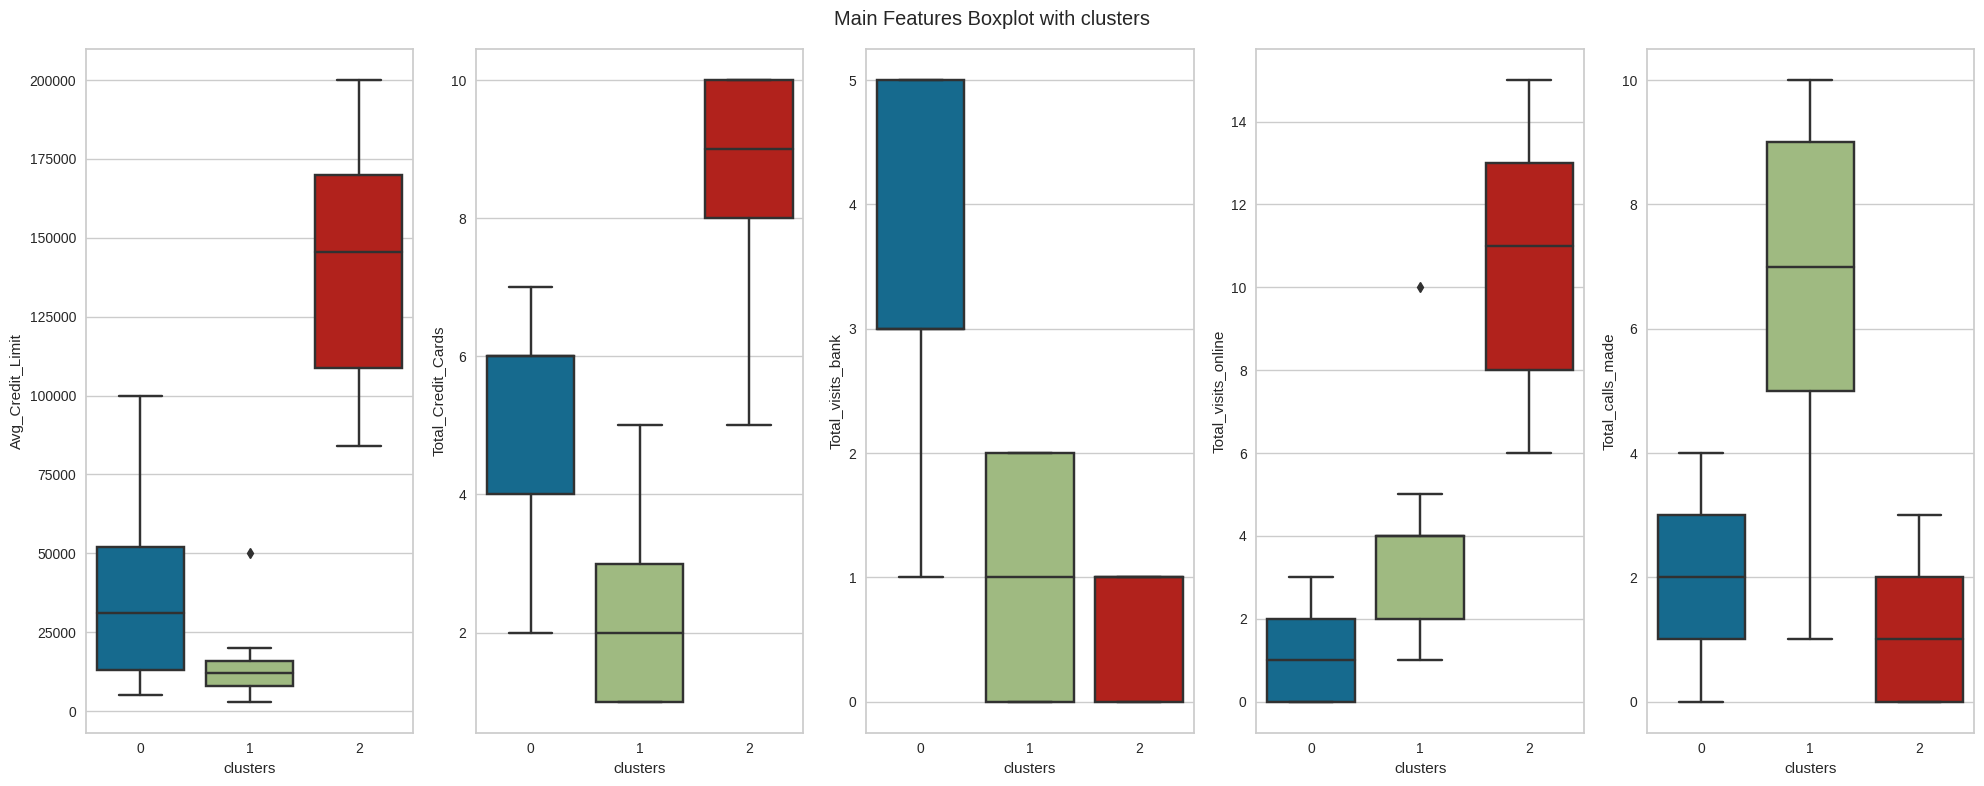

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(20,8))
fig.suptitle('Main Features Boxplot with clusters')
for ii in range(5):
  sns.boxplot(ax=axes[ii],x=df['clusters'],data=df,y=df[df.columns[ii]])
plt.tight_layout()
plt.show()

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

*   Kmeans took less time as the algorithm looked relatively simple when compared with Hierarchical Clustering
Kmeans has common guidelines which was easy to implement like SilhouetteVisualizer/Elbow etc
*   Both the techniques gave the same number of distinct clusters which is 3
*   Cluster 0 of Kmeans had 224 and of HierCluster had 385, Cluster 1 of Kmeans had 386 and HierCluster had 225, Cluster 2 had the same count of observations







## Actionable Insights and Recommendations

-


###Insights

Cluster 0


*   Contains medium credit limit group customers
*   Median Avg credit limit is slightly at the lower end of the range approx 300k
*   The median number of credit cards  is 4 which suggest an average usage
*   Higher visit to the banks, low usage of online banking features
*   Contains the highest number of customers

Cluster 1

*   Has lower credit limit group customers


*   Has lesser number of credit cards with a median of 2

*   Lesser visits to the bank and somewhat moderate usage of online features
*   Higher usage of phone support


*   Second highest number of customers.


Cluster 2


1.   Contains higher credit limit group customers
1.   HIgher credit limit and number of credit cards
2.   Lesser visits to the bank and low usage of phone support
2.   Higher usage of online features
1.  Low customer base.











###Recommendations



1.   Focus marketing efforts to bring in more higher credit limit group of customers
2.   Increase credit limits of Cluster 0 and 1 groups based on their credit history
1.   Innovate new product types for cluster 1 and 0 customer group based on their transaction history, as their credit card usage seems to be low.
1.   Encourage customers to use online features as phone and in person support is expensive
2.   Investigate the reasons behind the high number of inperson and phone support needed for cluster 0 and 1 customers
2.   Educate and or provide incentives for cluster 0 and 1 customers to use more online banking which decreases expenses for inperson and phone support.





In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/aiml/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/aiml/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.ipynb to html
[NbConvertApp] Writing 2111223 bytes to /content/drive/MyDrive/aiml/Full_Code_AIML_USL_Project_CreditCardCustomerSegmentation.html
